## Section F. Logistic Regression vs. Bayesian Classifier

### Question 7 [Discriminative vs Generative Models]

In [1]:
# install.packages('mvtnorm')
library(reshape2)
library(ggplot2)
library(mvtnorm) # generates multivariate Gaussian sampels and calculate the densities

Warning message:
"package 'reshape2' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'mvtnorm' was built under R version 3.6.2"

1. Load Task1E_train.csv and Task1E_test.csv as well as the Bayesian
classifier (BC) and logistic regression (LR) codes from Activities 2 and 3 in
Module 3.


In [2]:
train_data = read.csv('Task1E_train.csv')
test_data = read.csv('Task1E_test.csv')
head(train_data)
head(test_data)

x1,x2,y
-0.4367052,3.171451,-1
5.1048972,1.227815,1
3.9974518,1.049502,1
2.5354540,1.242902,1
4.2624556,2.551909,1
1.5505866,2.595164,-1


x1,x2,y
3.4781571,-0.51546992,1
4.8959781,0.95320554,1
-0.5783557,5.44553527,-1
3.8417831,0.65759443,1
2.2649154,4.18082840,-1
3.8550566,-0.08328894,1


Now we will be Splitting the training and testing data into Label and its predictors

In [3]:
train.data = train_data[1:2]
train.label = train_data[3]

In [4]:
test.data = test_data[1:2]
test.label = test_data[3]

In [5]:
c0 <- 1;c1 <- -1

## Bayesian Classifier 

Calculating the Class Probabilities

In [6]:
p0.hat <- sum(train.label==c0)/nrow(train.data) # total number of samples in class 0 divided by the total nmber of training data
p1.hat <- sum(train.label==c1)/nrow(train.data) # or simply 1 - p1.hat

Calculating Class Means

In [7]:
mu0.hat <- colMeans(train.data[train.label==c0,])
mu1.hat <- colMeans(train.data[train.label==c1,])

Calculating the variance matrices

In [8]:
sigma0.hat <- var(train.data[train.label==c0,])
sigma1.hat <- var(train.data[train.label==c1,])

# shared covariance matrix:
sigma.hat <- p0.hat * sigma0.hat + p1.hat * sigma1.hat 
print(sigma.hat)

           x1         x2
x1 0.93685812 0.09835919
x2 0.09835919 1.01292261


Now, we calculate the postoriors based on the estimated parameters in the above steps.

In [9]:
# calculate posteriors:
posterior0 <- p0.hat*dmvnorm(x=train.data, mean=mu0.hat, sigma=sigma.hat)
posterior1 <- p1.hat*dmvnorm(x=train.data, mean=mu1.hat, sigma=sigma.hat)

In [10]:
# calculate predictions:`
train.predict <- ifelse(posterior0 > posterior1, c0, c1)
test.predict <- ifelse(p0.hat*dmvnorm(x=test.data, mean=mu0.hat, sigma=sigma.hat) > p1.hat*dmvnorm(x=test.data, mean=mu1.hat, sigma=sigma.hat), c0, c1)

# calculate accuracy:
cat(sprintf('\nTraining accuracy:\t%.2f%%', sum(train.label==train.predict)/nrow(train.data)*100))
cat(sprintf('\nTesting accuracy:\t%.2f%%', sum(test.label==test.predict)/nrow(test.data)*100))


Training accuracy:	97.20%
Testing accuracy:	98.00%

## Logistic Regression

In [11]:
# auxiliary function that predicts class labels
predict <- function(w, X, c0, c1){
    sig <- sigmoid(w, X)
    return(ifelse(sig>0.5, c1,c0))
}
    
# auxiliary function that calculate a cost function
cost <- function (w, X, T, c0){
    sig <- sigmoid(w, X)
    return(sum(ifelse(T==c0, 1-sig, sig)))
}

Now we define the Sigmoid Function

In [12]:
# Sigmoid function (=p(C1|X))
sigmoid <- function(w, x){
    return(1.0/(1.0+exp(-w%*%t(cbind(1,x)))))    
}

In [18]:
# Initializations
tau.max <- 1000 # maximum number of iterations
eta <- 0.01 # learning rate
epsilon <- 0.01 # a threshold on the cost (to terminate the process)
tau <- 1 # iteration counter
terminate <- FALSE

## Just a few name/type conversion to make the rest of the code easy to follow
X <- as.matrix(train.data) # rename just for conviniance
T <- ifelse(train.label==c0,1,-1) # rename just for conviniance
#T <- train.label
W <- matrix(,nrow=tau.max, ncol=(ncol(X)+1)) # to be used to store the estimated coefficients
W[1,] <- runif(ncol(W)) # initial weight (any better idea?)

# project data using the sigmoid function (just for convenient)
# print(X)
Y <- sigmoid(W[1,],X)
print(Y)
costs <- data.frame('tau'=1:tau.max)  # to be used to trace the cost in each iteration
costs[1, 'cost'] <- cost(W[1,],X,T, c0)

          [,1]      [,2]     [,3]      [,4]      [,5]      [,6]      [,7]
[1,] 0.9519858 0.8929703 0.872105 0.8740102 0.9494622 0.9402772 0.8044169
          [,8]      [,9]     [,10]     [,11]     [,12]     [,13]     [,14]
[1,] 0.9320146 0.9662144 0.8708175 0.9717172 0.9597414 0.8606624 0.9862236
         [,15]     [,16]    [,17]     [,18]     [,19]     [,20]    [,21]
[1,] 0.9931702 0.8596905 0.875913 0.9334757 0.9910741 0.9402416 0.786966
         [,22]     [,23]     [,24]     [,25]     [,26]     [,27]     [,28]
[1,] 0.9243642 0.9006621 0.7510573 0.7846944 0.8329188 0.7541715 0.9354262
         [,29]     [,30]     [,31]     [,32]     [,33]     [,34]     [,35]
[1,] 0.8922232 0.7824873 0.8588064 0.8574494 0.9141472 0.8751978 0.7646838
         [,36]     [,37]     [,38]     [,39]     [,40]     [,41]     [,42]
[1,] 0.9354584 0.8008303 0.8328988 0.9724129 0.9957656 0.7470017 0.9004612
         [,43]     [,44]     [,45]    [,46]     [,47]     [,48]     [,49]
[1,] 0.7858249 0.7844944 0.97379

Now, we use SGD to learn the weight vector. <br> There are two loops. In the outter loop, we will shuffle the samples and then start the inner loop with each shuffle. <br> In the inner loop, we visit the training samples one by one and update the weights.

In [14]:
train.len = nrow(train.data)
while(!terminate){
    # check termination criteria:
    terminate <- tau >= tau.max | cost(W[tau,],X,T, c0)<=epsilon
    
    # shuffle data:
    train.index <- sample(1:train.len, train.len, replace = FALSE)
    X <- X[train.index,]
    T <- T[train.index]
    
    # for each datapoint:
    for (i in 1:train.len){
        # check termination criteria:
        if (tau >= tau.max | cost(W[tau,],X,T, c0) <=epsilon) {terminate<-TRUE;break}
        
        Y <- sigmoid(W[tau,],X)
            
        # Update the weights
        W[(tau+1),] <- W[tau,] - eta * (Y[i]-T[i]) * cbind(1, t(X[i,]))
        
        # record the cost:
        costs[(tau+1), 'cost'] <- cost(W[tau,],X,T, c0)
        
        # update the counter:
        tau <- tau + 1
        
        # decrease learning rate:
        eta = eta * 0.999
    }
}
costs <- costs[1:tau, ] # remove the NaN tail of the vector (in case of early stopping)

# the  final result is:
w <- W[tau,]
cat('\nThe  final coefficents are:',w)


The  final coefficents are: -0.2681896 2.607925 -6.438941

2. Using the first 5 data points from the training set, train a BC and a LR model,
and compute their training and testing errors. In a “for loop”, increase the
size of training set (5 data points at a time), retrain the models and
calculate their training and testing errors until all training data points are
used. In one figure, plot the training errors of the BC and LR models (with
different colors) versus the size of the training set and in the other figure,
plot the testing errors of the BC and LR models(with different colors)
versus the size of the training set; include two plots in your Jupyter
Notebook file for Question 7.

## Bayseian Classification

We will create a sequence of numbers that would increment the data size with 5.

In [15]:
size = seq(5,nrow(train.data),5)

In [16]:
train_error = c()
test_error = c()
for (i in 1:length(size)){
    train_subset = c() #train subset vector
    
    test_subset = c()
    train_label = 0
    test_label = 0
    train_subset = train.data[1:size[i],]
    train_label = train.label[1:size[i],]
    test_subset = test.data[1:size[i],]
    test_label = test.label[1:size[i],]
    
    p0.hat <- sum(train_label==c0)/nrow(train_subset) # total number of samples in class 0 divided by the total nmber of training data
    p1.hat <- sum(train_label==c1)/nrow(train_subset)
    
    mu0.hat <- colMeans(train_subset[train_label==c0,])
    mu1.hat <- colMeans(train_subset[train_label==c1,])
    
    sigma0.hat <- var(train_subset[train_label==c0,])
    sigma1.hat <- var(train_subset[train_label==c1,])
    
    sigma.hat <- p0.hat * sigma0.hat + p1.hat * sigma1.hat 
    
    # calculate posteriors:
    posterior0 <- p0.hat*dmvnorm(x=train_subset, mean=mu0.hat, sigma=sigma.hat)
    posterior1 <- p1.hat*dmvnorm(x=train_subset, mean=mu1.hat, sigma=sigma.hat)
    
    
    train.predict <- ifelse(posterior0 > posterior1, c0, c1)
    test.predict <- ifelse(p0.hat*dmvnorm(x=test_subset, mean=mu0.hat, sigma=sigma.hat) > p1.hat*dmvnorm(x=test_subset, mean=mu1.hat, sigma=sigma.hat), 1, -1)
    train_error[i]<-sum(train_label!=train.predict)/nrow(train_subset)
    test_error[i]<-sum(test_label!=test.predict)/nrow(test_subset)
}

## Logistic Regression

Creating a function that would take data and then train the model by increasing the data size by 5

In [17]:
logistic<-function(train.data,train.label,test.data,test.label){
# c0 <- 1; c1 <- -1 # class labels
tau.max <- 1000 # maximum number of iterations
eta <- 0.01 # learning rate
epsilon <- 0.01 # a threshold on the cost (to terminate the process)
tau <- 1 # iteration counter
terminate <- FALSE
train.len<-nrow(train.data)

## Just a few name/type conversion to make the rest of the code easy to follow
X <- as.matrix(train.data) # rename just for conviniance
T <- ifelse(train.label==c0,0,1) # rename just for conviniance

W <- matrix(,nrow=tau.max, ncol=(ncol(X)+1)) # to be used to store the estimated coefficients
W[1,] <- runif(ncol(W)) # initial weight (any better idea?)

# project data using the sigmoid function (just for convenient)
Y <- sigmoid(W[1,],X)

costs <- data.frame('tau'=1:tau.max)  # to be used to trace the cost in each iteration
costs[1, 'cost'] <- cost(W[1,],X,T, c0)

# X

while(!terminate){
    # check termination criteria:
    terminate <- tau >= tau.max | cost(W[tau,],X,T, c0)<=epsilon
   
    # shuffle data:
    train.index <- sample(1:train.len, train.len, replace = FALSE)
    X <- X[train.index,]
    T <- T[train.index]
   
    # for each datapoint:
    for (i in 1:train.len){
        # check termination criteria:
        if (tau >= tau.max | cost(W[tau,],X,T, c0) <=epsilon) {terminate<-TRUE;break}
       
        Y <- sigmoid(W[tau,],X)
           
        # Update the weights
        W[(tau+1),] <- W[tau,] - eta * (Y[i]-T[i]) * cbind(1, t(X[i,]))
       
        # record the cost:
        costs[(tau+1), 'cost'] <- cost(W[tau,],X,T, c0)
       
        # update the counter:
        tau <- tau + 1
       
        # decrease learning rate:
        eta = eta * 0.999
    }
}
costs <- costs[1:tau, ] # remove the NaN tail of the vector (in case of early stopping)

# the  final result is:
w <- W[tau,]
   
    train_predict<-predict(w,train.data,c0,c1)
    test_predict<-predict(w,test.data,c0,c1)
   
    train_error<-sum(train.label!=train_predict)/nrow(train.data)
    test_error<-sum(test.label!=test_predict)/nrow(test.data)
   
    return(list('train_error'=train_error,'test_error'=test_error))

}

In [18]:
training_error_log<-c()
testing_error_log<-c()
for (i in (1:length(size))){
    len<-size[i]
    d=logistic(train.data[1:len,],train.label[1:len,],test.data[1:len,],test.label[1:len,])
    training_error_log[i]<-d$train_error
    testing_error_log[i]<-d$test_error
   
}

In [19]:
training_error_df = data.frame(size,training_error_log,train_error)
testing_error_df = data.frame(size,testing_error_log,test_error)

In [20]:
miss.train = melt(training_error_df,id="size")
miss.test = melt(testing_error_df,id="size")

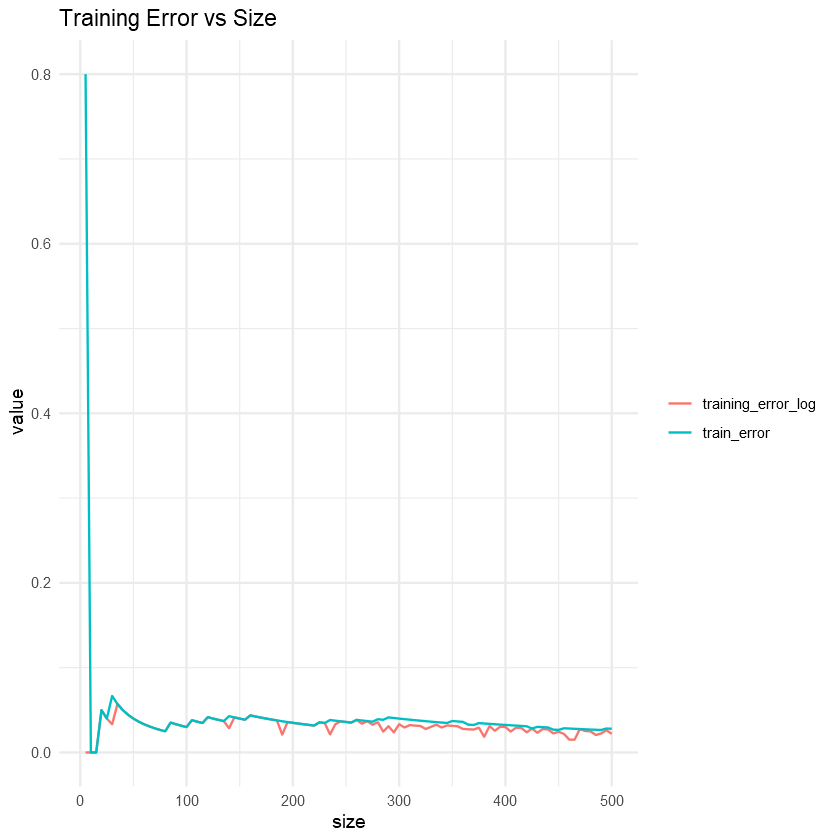

In [21]:
ggplot(data=miss.train, aes(x=size, y=value ,color=variable)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Training Error vs Size")

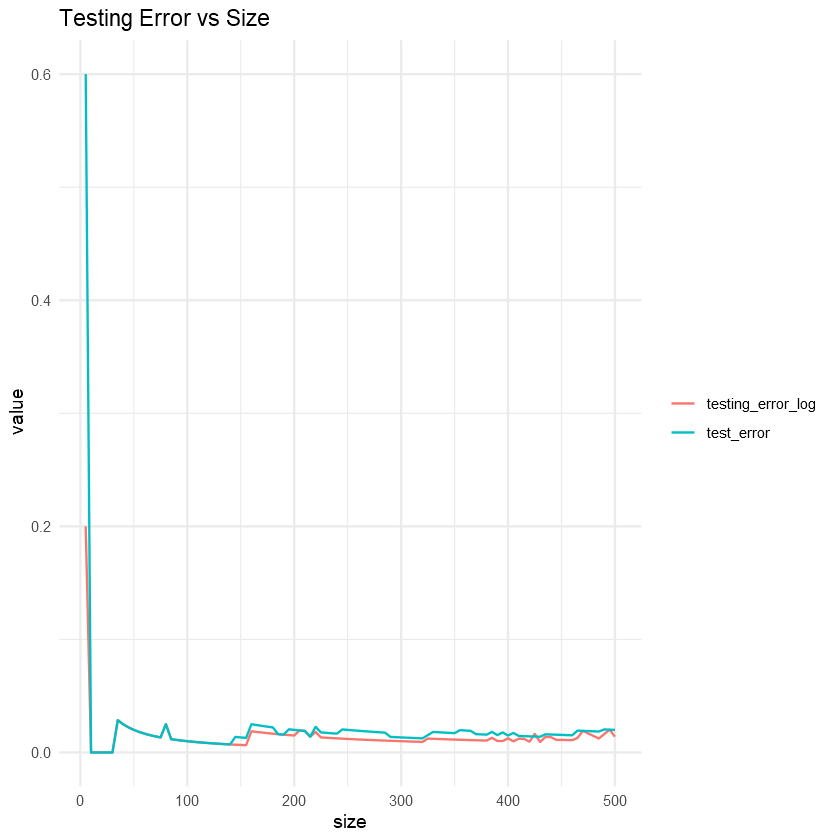

In [22]:
ggplot(data=miss.test, aes(x=size, y=value ,color=variable)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Testing Error vs Size")

3. Explain your observations in your Jupyter Notebook file.:

**a. What does happen for each classifier when the number of training data points is increased?**


For both the Bayesian and Logistics Classifier, when the number of training data points increase, both train and test errors show a decrease with initial data points. <br>

Minor Fluctuations can be visualised for both training and testing errors for larger training data points.

For smaller data e.g when  size =5 train error is quite large in Bayesian classifier compared with Logistic Classifier.

In case of testing, for size=5 test error is large in Bayesian Classifier compared to Logistic Classifier.

**b. Which classifier is best suited when the training set is small, and
which is best suited when the training set is big?**

By comparing both the training and testing errors for Bayesian and Logistic Classifiers, when the training set is small choosing Logistic classifier gives low training and test errors as compared to the Bayesian Classifier.

But when training set is larger, both classifiers give same rates of errors because both the classifiers are result in very minor train, test fluctuations. <br>
By looking at the graph, Logistic classifier seems to be a better choice for large datasets aswell.

**c. Justify your observations in previous questions (III.a & III.b) by
providing some speculations and possible reasons.**

The reason for this could be the class imbalance and less number of classes. As we have only two class labels to predict i.e c0 adn c1.